## 1

Epoch: 0
Mean Train Loss: 4.02e-01
Mean Test Loss:  2.60e-01
Epoch: 10
Mean Train Loss: 1.46e-01
Mean Test Loss:  3.51e-01
Epoch: 20
Mean Train Loss: 1.10e-01
Mean Test Loss:  5.34e-01
Epoch: 30
Mean Train Loss: 7.58e-02
Mean Test Loss:  6.02e-01
Epoch: 40
Mean Train Loss: 6.36e-02
Mean Test Loss:  6.80e-01
Epoch: 50
Mean Train Loss: 2.96e-02
Mean Test Loss:  7.67e-01
Epoch: 60
Mean Train Loss: 3.13e-02
Mean Test Loss:  8.65e-01
Epoch: 70
Mean Train Loss: 3.03e-02
Mean Test Loss:  8.49e-01
Epoch: 80
Mean Train Loss: 2.56e-02
Mean Test Loss:  8.31e-01
Epoch: 90
Mean Train Loss: 1.62e-02
Mean Test Loss:  1.02e+00
Epoch: 100
Mean Train Loss: 9.80e-03
Mean Test Loss:  1.11e+00


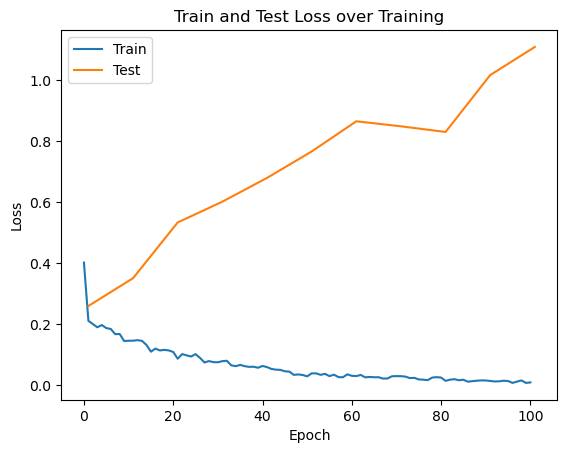

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.nn.functional import conv2d, max_pool2d, cross_entropy

plt.rc("figure", dpi=100)

batch_size = 100

# transform images into normalized tensors
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

train_dataset = datasets.MNIST(
    "./",
    download=True,
    train=True,
    transform=transform,
)

test_dataset = datasets.MNIST(
    "./",
    download=True,
    train=False,
    transform=transform,
)

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1,
    pin_memory=True,
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=1,
    pin_memory=True,
)

def init_weights(shape):
    # Kaiming He initialization (a good initialization is important)
    # https://arxiv.org/abs/1502.01852
    std = np.sqrt(2. / shape[0])
    w = torch.randn(size=shape) * std
    w.requires_grad = True
    return w


def rectify(x):
    # Rectified Linear Unit (ReLU)
    return torch.max(torch.zeros_like(x), x)


class RMSprop(optim.Optimizer):
    """
    This is a reduced version of the PyTorch internal RMSprop optimizer
    It serves here as an example
    """
    def __init__(self, params, lr=1e-3, alpha=0.5, eps=1e-8):
        defaults = dict(lr=lr, alpha=alpha, eps=eps)
        super(RMSprop, self).__init__(params, defaults)

    def step(self):
        for group in self.param_groups:
            for p in group['params']:
                grad = p.grad.data
                state = self.state[p]

                # state initialization
                if len(state) == 0:
                    state['square_avg'] = torch.zeros_like(p.data)

                square_avg = state['square_avg']
                alpha = group['alpha']

                # update running averages
                square_avg.mul_(alpha).addcmul_(grad, grad, value=1 - alpha)
                avg = square_avg.sqrt().add_(group['eps'])

                # gradient update
                p.data.addcdiv_(grad, avg, value=-group['lr'])


# define the neural network
def model(x, w_h, w_h2, w_o):
    h = rectify(x @ w_h)
    h2 = rectify(h @ w_h2)
    pre_softmax = h2 @ w_o
    return pre_softmax


# initialize weights

# input shape is (B, 784)
w_h = init_weights((784, 625))
# hidden layer with 625 neurons
w_h2 = init_weights((625, 625))
# hidden layer with 625 neurons
w_o = init_weights((625, 10))
# output shape is (B, 10)

optimizer = RMSprop(params=[w_h, w_h2, w_o])


n_epochs = 100

train_loss = []
test_loss = []

# put this into a training loop over 100 epochs
for epoch in range(n_epochs + 1):
    train_loss_this_epoch = []
    for idx, batch in enumerate(train_dataloader):
        x, y = batch

        # our model requires flattened input
        x = x.reshape(batch_size, 784)
        # feed input through model
        noise_py_x = model(x, w_h, w_h2, w_o)

        # reset the gradient
        optimizer.zero_grad()

        # the cross-entropy loss function already contains the softmax
        loss = cross_entropy(noise_py_x, y, reduction="mean")

        train_loss_this_epoch.append(float(loss))

        # compute the gradient
        loss.backward()
        # update weights
        optimizer.step()

    train_loss.append(np.mean(train_loss_this_epoch))

    # test periodically
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}")
        print(f"Mean Train Loss: {train_loss[-1]:.2e}")
        test_loss_this_epoch = []

        # no need to compute gradients for validation
        with torch.no_grad():
            for idx, batch in enumerate(test_dataloader):
                x, y = batch
                x = x.reshape(batch_size, 784)
                noise_py_x = model(x, w_h, w_h2, w_o)

                loss = cross_entropy(noise_py_x, y, reduction="mean")
                test_loss_this_epoch.append(float(loss))

        test_loss.append(np.mean(test_loss_this_epoch))

        print(f"Mean Test Loss:  {test_loss[-1]:.2e}")

plt.plot(np.arange(n_epochs + 1), train_loss, label="Train")
plt.plot(np.arange(1, n_epochs + 2, 10), test_loss, label="Test")
plt.title("Train and Test Loss over Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

<font color='green'>Feedback: The task 1 is executed and implemented correctly as seen in the jupyter notebook</font>

## 2

Epoch: 0
Mean Train Loss: 2.14e+00
Mean Test Loss:  4.55e-01
Epoch: 10
Mean Train Loss: 9.20e-01
Mean Test Loss:  2.02e-01
Epoch: 20
Mean Train Loss: 1.10e+00
Mean Test Loss:  2.24e-01
Epoch: 30
Mean Train Loss: 1.22e+00
Mean Test Loss:  2.20e-01
Epoch: 40
Mean Train Loss: 1.30e+00
Mean Test Loss:  2.21e-01
Epoch: 50
Mean Train Loss: 1.44e+00
Mean Test Loss:  2.44e-01
Epoch: 60
Mean Train Loss: 1.49e+00
Mean Test Loss:  2.16e-01
Epoch: 70
Mean Train Loss: 1.55e+00
Mean Test Loss:  2.53e-01
Epoch: 80
Mean Train Loss: 1.62e+00
Mean Test Loss:  2.19e-01
Epoch: 90
Mean Train Loss: 1.67e+00
Mean Test Loss:  2.40e-01
Epoch: 100
Mean Train Loss: 1.78e+00
Mean Test Loss:  2.65e-01


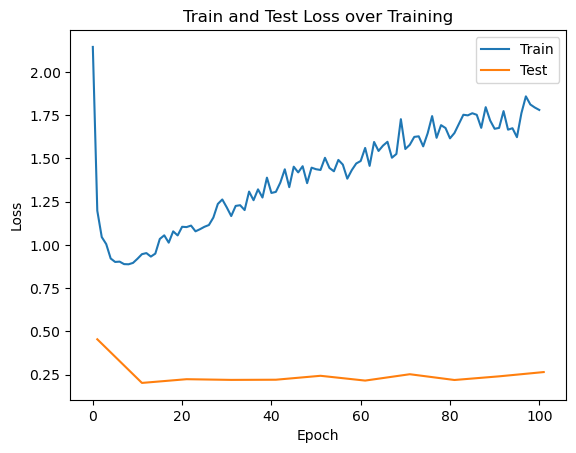

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.nn.functional import conv2d, max_pool2d, cross_entropy

plt.rc("figure", dpi=100)

batch_size = 100

# transform images into normalized tensors
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

train_dataset = datasets.MNIST(
    "./",
    download=True,
    train=True,
    transform=transform,
)

test_dataset = datasets.MNIST(
    "./",
    download=True,
    train=False,
    transform=transform,
)

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1,
    pin_memory=True,
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=1,
    pin_memory=True,
)

def init_weights(shape):
    # Kaiming He initialization (a good initialization is important)
    # https://arxiv.org/abs/1502.01852
    std = np.sqrt(2. / shape[0])
    w = torch.randn(size=shape) * std
    w.requires_grad = True
    return w


def rectify(x):
    # Rectified Linear Unit (ReLU)
    return torch.max(torch.zeros_like(x), x)


class RMSprop(optim.Optimizer):
    """
    This is a reduced version of the PyTorch internal RMSprop optimizer
    It serves here as an example
    """
    def __init__(self, params, lr=1e-3, alpha=0.5, eps=1e-8):
        defaults = dict(lr=lr, alpha=alpha, eps=eps)
        super(RMSprop, self).__init__(params, defaults)

    def step(self):
        for group in self.param_groups:
            for p in group['params']:
                grad = p.grad.data
                state = self.state[p]

                # state initialization
                if len(state) == 0:
                    state['square_avg'] = torch.zeros_like(p.data)

                square_avg = state['square_avg']
                alpha = group['alpha']

                # update running averages
                square_avg.mul_(alpha).addcmul_(grad, grad, value=1 - alpha)
                avg = square_avg.sqrt().add_(group['eps'])

                # gradient update
                p.data.addcdiv_(grad, avg, value=-group['lr'])
                
                
def model(x, w_h, w_h2, w_o):
    h = rectify(x @ w_h)
    h2 = rectify(h @ w_h2)
    pre_softmax = h2 @ w_o
    return pre_softmax


def dropout (X , p_drop = 0.5) :
    if 0 <= p_drop <= 1:
        binomial = torch.distributions.binomial.Binomial(1, probs = p_drop)
        mask = binomial.sample((1, X.shape[1]))
        x_masked = (X * mask)/(1 - p_drop)
        return x_masked
    else:
        return X

def dropout_model(X , w_h , w_h2 , w_o , p_drop_input , p_drop_hidden):
    X = (dropout(X, p_drop_input))
    h = dropout(rectify(X @ w_h), p_drop_hidden)
    h2 = dropout(rectify(h @ w_h2), p_drop_hidden)
    pre_softmax = h2 @ w_o
    return pre_softmax

# initialize weights

# input shape is (B, 784)
w_h = init_weights((784, 625))
# hidden layer with 625 neurons
w_h2 = init_weights((625, 625))
# hidden layer with 625 neurons
w_o = init_weights((625, 10))
# output shape is (B, 10)

optimizer = RMSprop(params=[w_h, w_h2, w_o])

n_epochs = 100

train_loss = []
test_loss = []

# put this into a training loop over 100 epochs
for epoch in range(n_epochs + 1):
    train_loss_this_epoch = []
    for idx, batch in enumerate(train_dataloader):
        x, y = batch

        # our model requires flattened input
        x = x.reshape(batch_size, 784)
        # feed input through model
        noise_py_x = dropout_model(x, w_h, w_h2, w_o, 0.5, 0.5)

        # reset the gradient
        optimizer.zero_grad()

        # the cross-entropy loss function already contains the softmax
        loss = cross_entropy(noise_py_x, y, reduction="mean")

        train_loss_this_epoch.append(float(loss))

        # compute the gradient
        loss.backward()
        # update weights
        optimizer.step()

    train_loss.append(np.mean(train_loss_this_epoch))

    # test periodically
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}")
        print(f"Mean Train Loss: {train_loss[-1]:.2e}")
        test_loss_this_epoch = []

        # no need to compute gradients for validation
        with torch.no_grad():
            for idx, batch in enumerate(test_dataloader):
                x, y = batch
                x = x.reshape(batch_size, 784)
                noise_py_x = model(x, w_h, w_h2, w_o)

                loss = cross_entropy(noise_py_x, y, reduction="mean")
                test_loss_this_epoch.append(float(loss))

        test_loss.append(np.mean(test_loss_this_epoch))

        print(f"Mean Test Loss:  {test_loss[-1]:.2e}")

plt.plot(np.arange(n_epochs + 1), train_loss, label="Train")
plt.plot(np.arange(1, n_epochs + 2, 10), test_loss, label="Test")
plt.title("Train and Test Loss over Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

**Dropout improves the test error while increasing the training error.
The way this is achieved is by random dropping some connections from the architecture at every epoch, by doing this we get a different network every time and we train it.
This is why the training loss keeps getting bigger: because we train a lot of different networks for very few times.
However, when in the testing we restore the complete network by scaling up the computed weights by the p_drop probability we get a very good result because it's like we fed the training set to multiple different networks**

<font color='green'>
Feedback on Task2:
    The dropout layeer is implemented partially correctly. </br>
    Explanation: The dropout layer was correctly initialized with binomial distribution of torch, although the mask sample was generated for only along the dimension of number of features (and excluding the number of data points). this will drop neurons at same indices as in first row for all rows (or same features for all samples).  Secondly, the given solution gives the output value of 1 when the mask is 1 and X is 1. It should be 0 when mask is 1. 
    </br>
The dropout model is implemented correctly and as suggested.
</br>
the question is answered satisfactorily and correctly.
</font>

## 3

Epoch: 0
Mean Train Loss: 8.12e+00
Mean Test Loss:  3.74e-01
Epoch: 10
Mean Train Loss: 1.32e-01
Mean Test Loss:  1.86e-01
Epoch: 20
Mean Train Loss: 1.07e-01
Mean Test Loss:  2.41e-01
Epoch: 30
Mean Train Loss: 1.02e-01
Mean Test Loss:  3.04e-01
Epoch: 40
Mean Train Loss: 8.91e-02
Mean Test Loss:  2.57e-01
Epoch: 50
Mean Train Loss: 7.94e-02
Mean Test Loss:  3.75e-01
Epoch: 60
Mean Train Loss: 7.93e-02
Mean Test Loss:  4.60e-01
Epoch: 70
Mean Train Loss: 7.27e-02
Mean Test Loss:  3.59e-01
Epoch: 80
Mean Train Loss: 6.23e-02
Mean Test Loss:  3.39e-01
Epoch: 90
Mean Train Loss: 6.84e-02
Mean Test Loss:  3.51e-01
Epoch: 100
Mean Train Loss: 6.29e-02
Mean Test Loss:  7.28e-01


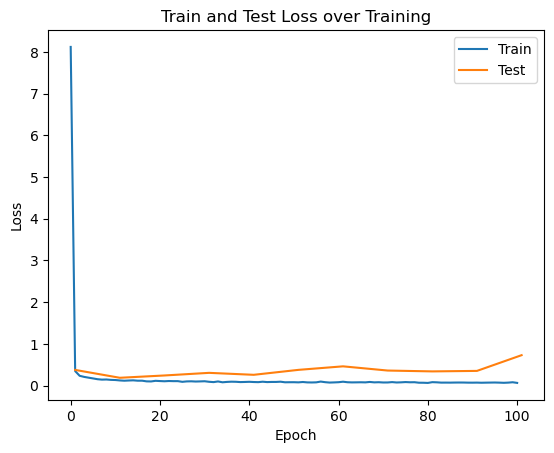

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.nn.functional import conv2d, max_pool2d, cross_entropy

plt.rc("figure", dpi=100)

batch_size = 100

# transform images into normalized tensors
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

train_dataset = datasets.MNIST(
    "./",
    download=True,
    train=True,
    transform=transform,
)

test_dataset = datasets.MNIST(
    "./",
    download=True,
    train=False,
    transform=transform,
)

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1,
    pin_memory=True,
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=1,
    pin_memory=True,
)

def PRelu (X ,a):
    mask = X <= 0
    X = torch.where(mask, X @ a, X)
    return X


def model(x, w_h, w_h2, w_o, a_h, a_h2):
    h = PRelu(x @ w_h, a_h)
    h2 = PRelu(h @ w_h2, a_h2)
    pre_softmax = h2 @ w_o
    return pre_softmax


def init_weights(shape):
    # Kaiming He initialization (a good initialization is important)
    # https://arxiv.org/abs/1502.01852
    std = np.sqrt(2. / shape[0])
    w = torch.randn(size=shape) * std
    w.requires_grad = True
    return w

# initialize weights
   
# input shape is (B, 784)
w_h = init_weights((784, 625))
a_h= init_weights((625, 1))
# hidden layer with 625 neurons
w_h2 = init_weights((625, 625))
a_h2 = init_weights((625,1))
# hidden layer with 625 neurons
w_o = init_weights((625, 10))

optimizer = RMSprop(params=[w_h, w_h2, w_o, a_h, a_h2])


n_epochs = 100

train_loss = []
test_loss = []

# put this into a training loop over 100 epochs
for epoch in range(n_epochs + 1):
    train_loss_this_epoch = []
    for idx, batch in enumerate(train_dataloader):
        x, y = batch

        # our model requires flattened input
        x = x.reshape(batch_size, 784)
        # feed input through model
        noise_py_x = model(x, w_h, w_h2, w_o, a_h, a_h2)

        # reset the gradient
        optimizer.zero_grad()

        # the cross-entropy loss function already contains the softmax
        loss = cross_entropy(noise_py_x, y, reduction="mean")

        train_loss_this_epoch.append(float(loss))

        # compute the gradient
        loss.backward()
        # update weights
        optimizer.step()

    train_loss.append(np.mean(train_loss_this_epoch))

    # test periodically
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}")
        print(f"Mean Train Loss: {train_loss[-1]:.2e}")
        test_loss_this_epoch = []

        # no need to compute gradients for validation
        with torch.no_grad():
            for idx, batch in enumerate(test_dataloader):
                x, y = batch
                x = x.reshape(batch_size, 784)
                noise_py_x = model(x, w_h, w_h2, w_o, a_h, a_h2)

                loss = cross_entropy(noise_py_x, y, reduction="mean")
                test_loss_this_epoch.append(float(loss))

        test_loss.append(np.mean(test_loss_this_epoch))

        print(f"Mean Test Loss:  {test_loss[-1]:.2e}")

plt.plot(np.arange(n_epochs + 1), train_loss, label="Train")
plt.plot(np.arange(1, n_epochs + 2, 10), test_loss, label="Test")
plt.title("Train and Test Loss over Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

**This turns out to be the best model overall for optimizing both training and test loss even though it performs slightly worse than the dropout model in terms of test loss.**

<font color='green'> Feedback on Task3:
    The PReLU layer is implemented correctly and as suggsted in sample solution. </br>
    </font>

## 4

**Here we reduced the number of epochs to 10 because we didn't have enough time but we think the overall trend should be pretty much already established even though performances are pretty bad compared to prevoius models**

In [25]:
from torch.nn.functional import conv2d, max_pool2d

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.nn.functional import conv2d, max_pool2d, cross_entropy

plt.rc("figure", dpi=100)

batch_size = 10

def dropout (X , p_drop = 0.5) :
    if 0 <= p_drop <= 1:
        sample = torch.rand_like(X)
        mask = torch.bernoulli(sample)
        X = X * mask
        X = X / (1 - p_drop)
        return X
    else:
        return X

# transform images into normalized tensors
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

train_dataset = datasets.MNIST(
    "./",
    download=True,
    train=True,
    transform=transform,
)

test_dataset = datasets.MNIST(
    "./",
    download=True,
    train=False,
    transform=transform,
)

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1,
    pin_memory=True,
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=1,
    pin_memory=True,
)

def init_weights(shape):
    # Kaiming He initialization (a good initialization is important)
    # https://arxiv.org/abs/1502.01852
    std = np.sqrt(2. / shape[0])
    w = torch.randn(size=shape) * std
    w.requires_grad = True
    return w


def rectify(x):
    # Rectified Linear Unit (ReLU)
    return torch.max(torch.zeros_like(x), x)


class RMSprop(optim.Optimizer):
    """
    This is a reduced version of the PyTorch internal RMSprop optimizer
    It serves here as an example
    """
    def __init__(self, params, lr=1e-3, alpha=0.5, eps=1e-8):
        defaults = dict(lr=lr, alpha=alpha, eps=eps)
        super(RMSprop, self).__init__(params, defaults)

    def step(self):
        for group in self.param_groups:
            for p in group['params']:
                grad = p.grad.data
                state = self.state[p]

                # state initialization
                if len(state) == 0:
                    state['square_avg'] = torch.zeros_like(p.data)

                square_avg = state['square_avg']
                alpha = group['alpha']

                # update running averages
                square_avg.mul_(alpha).addcmul_(grad, grad, value=1 - alpha)
                avg = square_avg.sqrt().add_(group['eps'])

                # gradient update
                p.data.addcdiv_(grad, avg, value=-group['lr'])



def LeNetmodel(X, cnn_params, mlp_params, dropout_rates = [.5, .5, .5]):
    # X has shape (N, 1, 28, 28)
    N = X.shape[0]
    
    # Conv Layer 1
    convolution1 = rectify(conv2d(X, cnn_params[0])) # (N, 32, 24, 24)
    # reduces (2 ,2) window to 1 pixel
    subsampling1 = max_pool2d(convolution1, (2, 2)) # (N, 32, 12, 12)
    dropout1 = dropout(subsampling1, dropout_rates[0]) 
    
    # Conv Layer 2
    convolution2 = rectify(conv2d(dropout1, cnn_params[1])) # (N, 64, 8, 8)
    # reduces (2 ,2) window to 1 pixel
    subsampling2 = max_pool2d(convolution2, (2, 2)) # (N, 64, 4, 4)
    dropout2 = dropout(subsampling2, dropout_rates[1] )

    # Conv Layer 3
    convolution3 = rectify(conv2d(dropout2, cnn_params[2])) # (N, 128, 3, 3)
    # reduces (2 ,2) window to 1 pixel
    subsampling3 = max_pool2d(convolution3, (2, 2)) # (N, 128, 1, 1)
    dropout3 = dropout(subsampling3, dropout_rates[2] )
    
    # Flatten
    dropout3 = dropout3.reshape(N, dropout3.shape[1] * dropout3.shape[2] * dropout3.shape[3])
    #dropout2 = dropout2.reshape(-1, number_of_output_pixel)
    
    # Fully-Connected Layer 1
    h2 = rectify(dropout3 @ mlp_params[0])
    #h2 = rectify(dropout2 @ mlp_params[0])
    # Fully-Connected Layer 2, i.e pre-softmax
    pre_softmax = h2 @ mlp_params[1]

    return pre_softmax

Epoch: 0
Mean Train Loss: 2.72e+00
Mean Test Loss:  2.16e+00
Epoch: 1
Mean Train Loss: 2.23e+00
Mean Test Loss:  2.21e+00
Epoch: 2
Mean Train Loss: 2.25e+00
Mean Test Loss:  2.10e+00
Epoch: 3
Mean Train Loss: 2.23e+00
Mean Test Loss:  2.07e+00
Epoch: 4
Mean Train Loss: 2.18e+00
Mean Test Loss:  2.13e+00
Epoch: 5
Mean Train Loss: 2.18e+00
Mean Test Loss:  2.10e+00
Epoch: 6
Mean Train Loss: 2.20e+00
Mean Test Loss:  2.05e+00
Epoch: 7
Mean Train Loss: 2.23e+00
Mean Test Loss:  2.27e+00
Epoch: 8
Mean Train Loss: 2.25e+00
Mean Test Loss:  2.93e+00
Epoch: 9
Mean Train Loss: 2.38e+00
Mean Test Loss:  2.31e+00
Epoch: 10
Mean Train Loss: 2.48e+00
Mean Test Loss:  2.13e+00


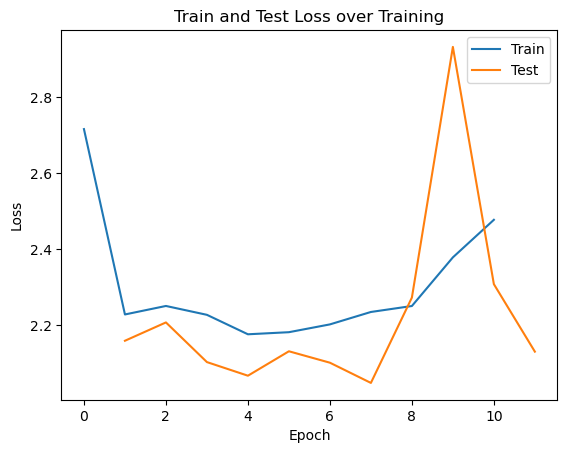

In [26]:
# initialize weights
channels = [32, 64, 128]
kernel= [5, 5, 2]
cnn_output_dim = 28

for k in kernel: 
    cnn_output_dim = (cnn_output_dim - k + 1) // 2 

# input shape is (B, 784)
f1 = init_weights((channels[0], 1, kernel[0], kernel[0]))
f2 = init_weights((channels[1], channels[0], kernel[1], kernel[1]))
f3 = init_weights((channels[2], channels[1], kernel[2], kernel[2]))
# hidden layer with 625 neurons
w_h2 = init_weights((channels[-1] * cnn_output_dim**2, 625))
# hidden layer with 625 neurons
w_o = init_weights((625, 10))
# output shape is (B, 10)

parameters = [f1, f2, f3, w_h2, w_o]
cnn_params = [f1, f2, f3]
mlp_params = [w_h2, w_o]

optimizer = RMSprop(params=parameters)

n_epochs = 10

train_loss = []
test_loss = []

# put this into a training loop over 100 epochs
for epoch in range(n_epochs + 1):
    train_loss_this_epoch = []
    for idx, batch in enumerate(train_dataloader):
        x, y = batch

        x.reshape(-1, 1, 28, 28)

        # feed input through model
        noise_py_x = LeNetmodel(x, cnn_params, mlp_params)

        # reset the gradient
        optimizer.zero_grad()

        # the cross-entropy loss function already contains the softmax
        loss = cross_entropy(noise_py_x, y, reduction="mean")

        train_loss_this_epoch.append(float(loss))

        # compute the gradient
        loss.backward()
        # update weights
        optimizer.step()

    train_loss.append(np.mean(train_loss_this_epoch))

    # test periodically
    if epoch % 1 == 0:
        print(f"Epoch: {epoch}")
        print(f"Mean Train Loss: {train_loss[-1]:.2e}")
        test_loss_this_epoch = []

        # no need to compute gradients for validation
        with torch.no_grad():
            for idx, batch in enumerate(test_dataloader):
                x, y = batch
                x.reshape(-1, 1, 28, 28)
                noise_py_x = LeNetmodel(x, cnn_params, mlp_params)

                loss = cross_entropy(noise_py_x, y, reduction="mean")
                test_loss_this_epoch.append(float(loss))

        test_loss.append(np.mean(test_loss_this_epoch))

        print(f"Mean Test Loss:  {test_loss[-1]:.2e}")

plt.plot(np.arange(n_epochs + 1), train_loss, label="Train")
plt.plot(np.arange(1, n_epochs + 2), test_loss, label="Test")
plt.title("Train and Test Loss over Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

**Here we removed one convolutional layer and tweaked the other two to make them more similar to the original LeNet, we still run it for fewer epochs but we can see that the performances had a significant improvement.**

In [27]:
number_of_output_pixel = 64 * 5 * 5

def LeNetmodel(X, cnn_params, mlp_params, dropout_rates = [.5, .5, .5]):
    # X has shape (N, 1, 28, 28)
    N = X.shape[0]
    
    # Conv Layer 1
    convolution1 = rectify(conv2d(X, cnn_params[0], padding = 2)) # (N, 32, 28, 28)
    # reduces (2 ,2) window to 1 pixel
    subsampling1 = max_pool2d(convolution1, (2, 2)) # (N, 32, 14, 14)
    dropout1 = dropout(subsampling1, dropout_rates[0]) 
    
    # Conv Layer 2
    convolution2 = rectify(conv2d(dropout1, cnn_params[1])) # (N, 64, 14, 14)
    # reduces (2 ,2) window to 1 pixel
    subsampling2 = max_pool2d(convolution2, (2, 2)) # (N, 64, 5, 5)
    dropout2 = dropout(subsampling2, dropout_rates[1] )
    
    # Flatten
    dropout2 = dropout2.reshape(-1, number_of_output_pixel)
    
    # Fully-Connected Layer 1
    h2 = rectify(dropout2 @ mlp_params[0])
    # Fully-Connected Layer 2, i.e pre-softmax
    pre_softmax = h2 @ mlp_params[1]

    return pre_softmax

In [28]:
# initialize weights
channels = [32, 64, 128]
kernel= [5, 5, 2]
cnn_output_dim = 28

for k in kernel: 
    cnn_output_dim = (cnn_output_dim - k + 1) // 2 

# input shape is (B, 784)
f1 = init_weights((channels[0], 1, kernel[0], kernel[0]))
f2 = init_weights((channels[1], channels[0], kernel[1], kernel[1]))
# hidden layer with 625 neurons
w_h2 = init_weights((number_of_output_pixel, 625))
# hidden layer with 625 neurons
w_o = init_weights((625, 10))
# output shape is (B, 10)

parameters = [f1, f2, w_h2, w_o]
cnn_params = [f1, f2]
mlp_params = [w_h2, w_o]

optimizer = RMSprop(params=parameters)

n_epochs = 10

train_loss = []
test_loss = []

# put this into a training loop over 100 epochs
for epoch in range(n_epochs + 1):
    train_loss_this_epoch = []
    for idx, batch in enumerate(train_dataloader):
        x, y = batch

        x.reshape(-1, 1, 28, 28)

        # feed input through model
        noise_py_x = LeNetmodel(x, cnn_params, mlp_params)

        # reset the gradient
        optimizer.zero_grad()

        # the cross-entropy loss function already contains the softmax
        loss = cross_entropy(noise_py_x, y, reduction="mean")

        train_loss_this_epoch.append(float(loss))

        # compute the gradient
        loss.backward()
        # update weights
        optimizer.step()

    train_loss.append(np.mean(train_loss_this_epoch))

    # test periodically
    if epoch % 1 == 0:
        print(f"Epoch: {epoch}")
        print(f"Mean Train Loss: {train_loss[-1]:.2e}")
        test_loss_this_epoch = []

        # no need to compute gradients for validation
        with torch.no_grad():
            for idx, batch in enumerate(test_dataloader):
                x, y = batch
                x.reshape(-1, 1, 28, 28)
                noise_py_x = LeNetmodel(x, cnn_params, mlp_params)

                loss = cross_entropy(noise_py_x, y, reduction="mean")
                test_loss_this_epoch.append(float(loss))

        test_loss.append(np.mean(test_loss_this_epoch))

        print(f"Mean Test Loss:  {test_loss[-1]:.2e}")

plt.plot(np.arange(n_epochs + 1), train_loss, label="Train")
plt.plot(np.arange(1, n_epochs + 2), test_loss, label="Test")
plt.title("Train and Test Loss over Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

Epoch: 0
Mean Train Loss: 9.56e-01
Mean Test Loss:  7.23e-01
Epoch: 1
Mean Train Loss: 9.43e-01
Mean Test Loss:  8.11e-01
Epoch: 2
Mean Train Loss: 1.13e+00
Mean Test Loss:  9.75e-01
Epoch: 3
Mean Train Loss: 1.18e+00
Mean Test Loss:  1.03e+00
Epoch: 4
Mean Train Loss: 1.18e+00
Mean Test Loss:  1.05e+00


KeyboardInterrupt: 

**This should be the way you show the images of the test set and their filtered versions. However we didn't have the time to try it**

In [ ]:
def convolution(X, cnn_params, mlp_params, dropout_rates = [.5, .5, .5]):
     
      filter1 = cnn_params[0][0]
      filter2 = cnn_params[0][1]
      filter3 = cnn_params[0][2]

      convolution11 = rectify(conv2d(X[0][0], filter1)) 
      convolution12 = rectify(conv2d(convolution11, filter2)) 
      convolution13 = rectify(conv2d(convolution12, filter3)) 

      return [convolution13, filter1, filter2, filter3]


def show(i, dropout, filter1, filter2, filter3):
    plt.imshow(i[0][0], cmap = 'gray')
    plt.imshow(dropout.numpy(), cmap = 'gray')
    plt.imshow(filter1.numpy(), cmap = 'gray')
    plt.imshow(filter2.numpy(), cmap = 'gray')
    plt.imshow(filter3.numpy(), cmap = 'gray')

# initialize weights
channels = [32, 64, 128]
kernel= [5, 5, 2]
cnn_output_dim = 28

for k in kernel: 
    cnn_output_dim = (cnn_output_dim - k + 1) // 2 

# input shape is (B, 784)
f1 = init_weights((channels[0], 1, kernel[0], kernel[0]))
f2 = init_weights((channels[1], channels[0], kernel[1], kernel[1]))
f3 = init_weights((channels[2], channels[1], kernel[2], kernel[2]))
# hidden layer with 625 neurons
w_h2 = init_weights((channels[-1] * cnn_output_dim**2, 625))
#w_h2 = init_weights((1600, 625))
# hidden layer with 625 neurons
w_o = init_weights((625, 10))
# output shape is (B, 10)

parameters = [f1, f2, f3, w_h2, w_o]
cnn_params = [f1, f2, f3]
mlp_params = [w_h2, w_o]

optimizer = RMSprop(params=parameters)

n_epochs = 10

train_loss = []
test_loss = []


# put this into a training loop over 100 epochs
for epoch in range(n_epochs + 1):
    train_loss_this_epoch = []
    for idx, batch in enumerate(train_dataloader):
        x, y = batch

        x.reshape(-1, 1, 28, 28)

        # feed input through model
        noise_py_x = LeNetmodel(x, cnn_params, mlp_params)

        # reset the gradient
        optimizer.zero_grad()

        # the cross-entropy loss function already contains the softmax
        loss = cross_entropy(noise_py_x, y, reduction="mean")

        train_loss_this_epoch.append(float(loss))

        # compute the gradient
        loss.backward()
        # update weights
        optimizer.step()

    train_loss.append(np.mean(train_loss_this_epoch))

    # test periodically
    if epoch % 2 == 0:
        print(f"Epoch: {epoch}")
        print(f"Mean Train Loss: {train_loss[-1]:.2e}")
        test_loss_this_epoch = []

        # no need to compute gradients for validation
        with torch.no_grad():
            for idx, batch in enumerate(test_dataloader):
                x, y = batch
                x.reshape(-1, 1, 28, 28)
                noise_py_x = LeNetmodel(x, cnn_params, mlp_params)

                if idx == 100 and epoch == 0:
                    [d, f1, f2, f3] = convolution(x, cnn_params, mlp_params)
                    show(test_dataset[idx], d, f1, f2, f3)

                loss = cross_entropy(noise_py_x, y, reduction="mean")
                test_loss_this_epoch.append(float(loss))

        test_loss.append(np.mean(test_loss_this_epoch))

        print(f"Mean Test Loss:  {test_loss[-1]:.2e}")

plt.plot(np.arange(n_epochs + 1), train_loss, label="Train")
plt.plot(np.arange(1, n_epochs + 2), test_loss, label="Test")
plt.title("Train and Test Loss over Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

<font color='green' >Feedback on Task4:
    The convolution neural network was correctly implemented and works as expected. The modification was also implemented correctly. </br>
 The code for visualizing filteres also works as expected and correctly executed.</font>